In [1]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from scipy.special import hyp2f1, gamma

In [4]:
k = np.logspace(-2, 2, 1000)

In [5]:
a = 3*np.random.rand()
b = 3*np.random.rand()

In [6]:
a, b

(0.9998023490181721, 2.249335011845002)

In [7]:
p = k**a*np.exp(-b*k)

# corfu

In [8]:
import corfu

## Non-Limber

In [9]:
r, xi = corfu.ptoxi(k, p, q=0., limber=False)

In [10]:
xi2 = (r**2+b**2)**(-(a+2)/2)*gamma(a+2)*np.sin((a+2)*np.arctan(r/b))/(2*np.pi**2*r)

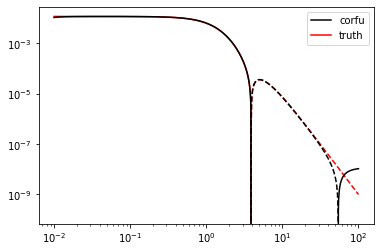

In [11]:
plt.loglog(r, +xi, '-k', label='corfu')
plt.loglog(r, -xi, '--k')
plt.loglog(r, +xi2, '-r', label='truth', zorder=-1)
plt.loglog(r, -xi2, '--r', zorder=-1)
plt.legend()
plt.show()

## Limber

In [12]:
r, xi = corfu.ptoxi(k, p, q=0., limber=True)

In [13]:
xi2 = b**(-a-2)*gamma(a+2)*hyp2f1((a+2)/2, (a+3)/2, 1, -(r/b)**2)/(2*np.pi*r)

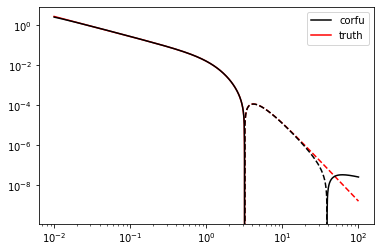

In [14]:
plt.loglog(r, +xi, '-k', label='corfu')
plt.loglog(r, -xi, '--k')
plt.loglog(r, +xi2, '-r', label='truth', zorder=-1)
plt.loglog(r, -xi2, '--r', zorder=-1)
plt.legend()
plt.show()